In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [2]:
def cost(X, y, w, b):
    m = len(X)
    return (sum([((np.dot(X[i], w) + b) - y[i])**2 for i in range(m)])/(2*m))

In [3]:
def z_score_normalization(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return (X-mean)/std, mean, std

In [4]:
def get_partials(X, y, w, b):
    m, n = np.shape(X)
    dw = np.zeros(n)
    db = 0

    for j in range(n):
        x = X[:,j]
        dw[j] = (sum([((np.dot(X[i], w) + b) - y[i]) * x[i] for i in range(m)]))/m
    db = (sum([((np.dot(X[i], w) + b) - y[i]) for i in range(m)]))/m
    return dw, db

In [5]:
def gradient_descent(X, y, iter, alpha):
    n = len(X[0])
    w = np.zeros(n)
    b = 0
    hist = np.array([])
    for i in range(iter):
        dw, db = get_partials(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        if i<100000: 
            hist = np.append(hist, cost(X, y, w, b))
    return w, b, hist

In [6]:
def plot_cost(hist):
    plt.plot(range(0, len(hist)), hist, label='Cost Function')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function')
    plt.title('Cost Function vs. Number of Iterations')

    plt.legend()

    plt.show()

[ 38.05  41.54 -30.99  36.34] 289.9922971943226


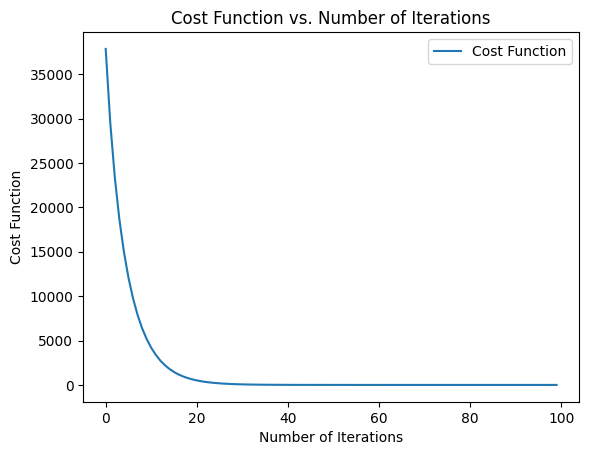

In [7]:
X = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y = np.array([460, 232, 178])

m, n = np.shape(X)
alpha = 0.1
iterations = 100

X_norm, mean, std = z_score_normalization(X)
w, b, hist = gradient_descent(X_norm, y, iterations, alpha)
print(w, b)
plot_cost(hist)

In [8]:
for i in range(m):
    Xi_norm = (X[i]-mean)/std
    print(round(np.dot(Xi_norm, w) + b), y[i])

460 460
232 232
178 178
